In [1]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


In [3]:
pip install fredapi

In [4]:
from fredapi import Fred

In [5]:
pd.set_option('display.max_columns', 500)
# in older versions display. was not used

In [6]:
 fred_key = '59b933f69ec5be49a19882be1978c5f9'

In [7]:
# Create the FRED object
fred = Fred(api_key = fred_key)

In [8]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [9]:
sp_search.shape

(1000, 15)

In [10]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-09-21   2023-09-21   
CSUSHPINSA          CSUSHPINSA     2023-09-21   2023-09-21   
MEHOINUSA672N    MEHOINUSA672N     2023-09-21   2023-09-21   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-09-21   2023-09-21   
SP500                    SP500     2023-09-21   2023-09-21   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-09-20  Daily, Close   
CSUSHPINSA            1987-01-01      2023-06-01       Monthly   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2023-09-20  Daily, Close   
SP500                 2013-09-23      2023-09-20  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
MEHOINUSA672N                A  2021 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   
SP500                        D                           Index   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
MEHOINUSA672N   2021 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-09-21 08:36:18-05:00   
CSUSHPINSA                           NSA  2023-08-29 08:11:02-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2023-09-21 08:36:22-05:00   
SP500                                NSA  2023-09-20 19:11:05-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             89  For more information regarding the index, plea...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         83  This data represents the effective yield of th...  
SP500                  83  The observations for the S&P 500 represent the...

In [11]:
# Pull Raw Data
sp500 = fred.get_series(series_id = 'SP500')

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1732: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  return self.major.locator()
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axis.py:1484: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future ver

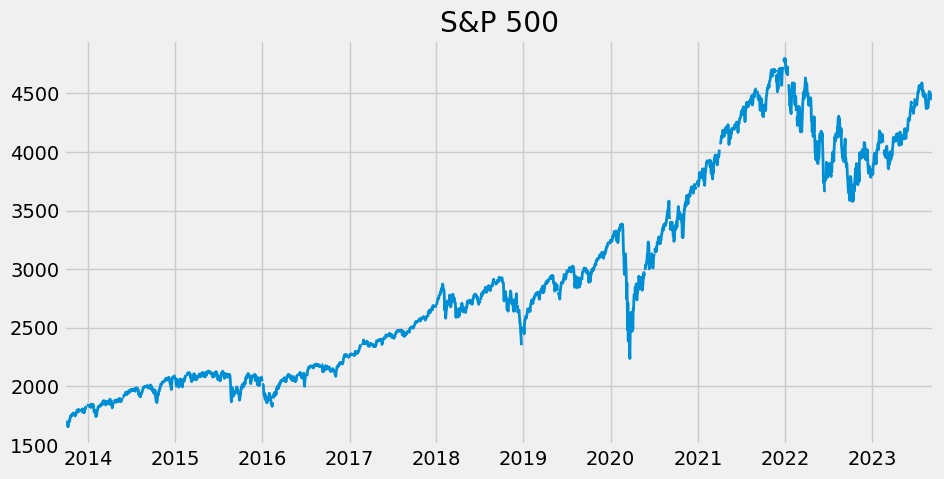

In [12]:
sp500.plot(figsize = (10, 5), title = 'S&P 500', lw = 2 )
plt.show()

In [13]:
# pull and join multiple data series
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [14]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
     # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [15]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [16]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [17]:
# Plot States Unemployment Rate
px.line(uemp_states)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


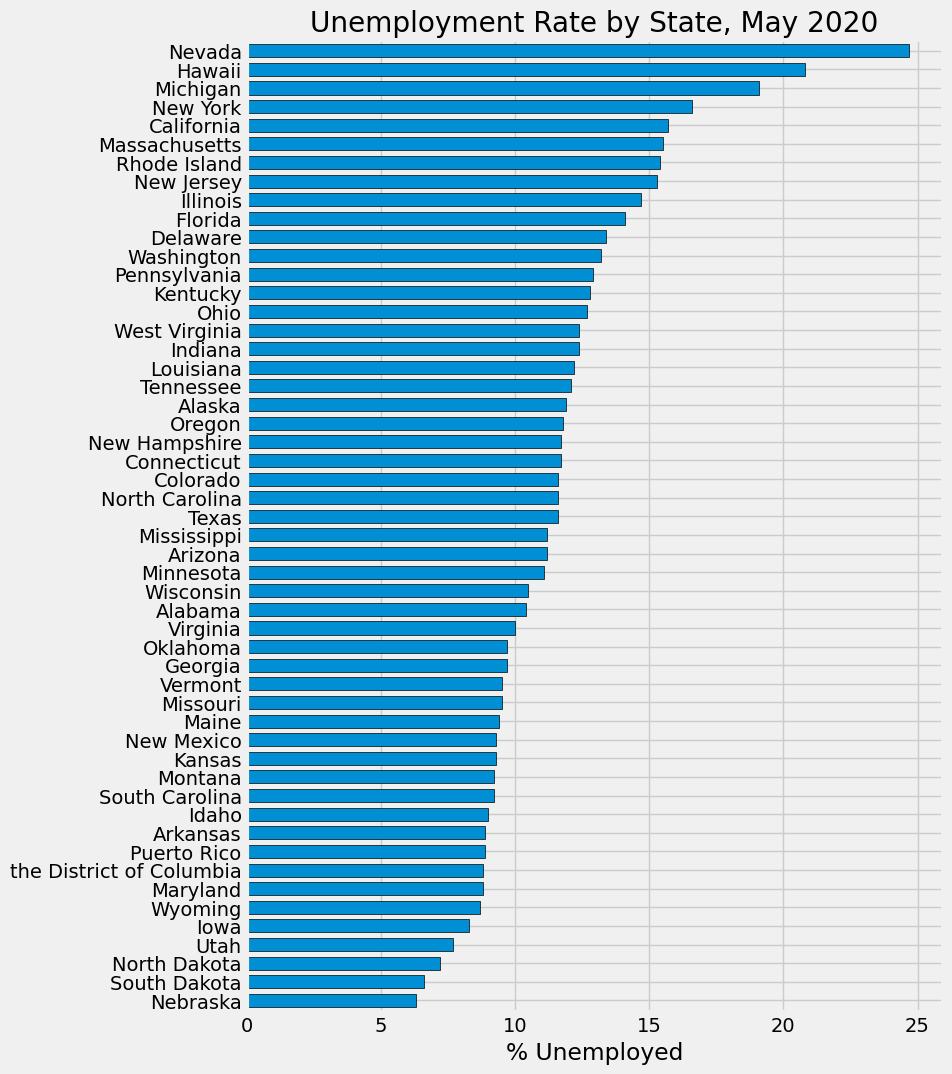

In [18]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [19]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [20]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [21]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

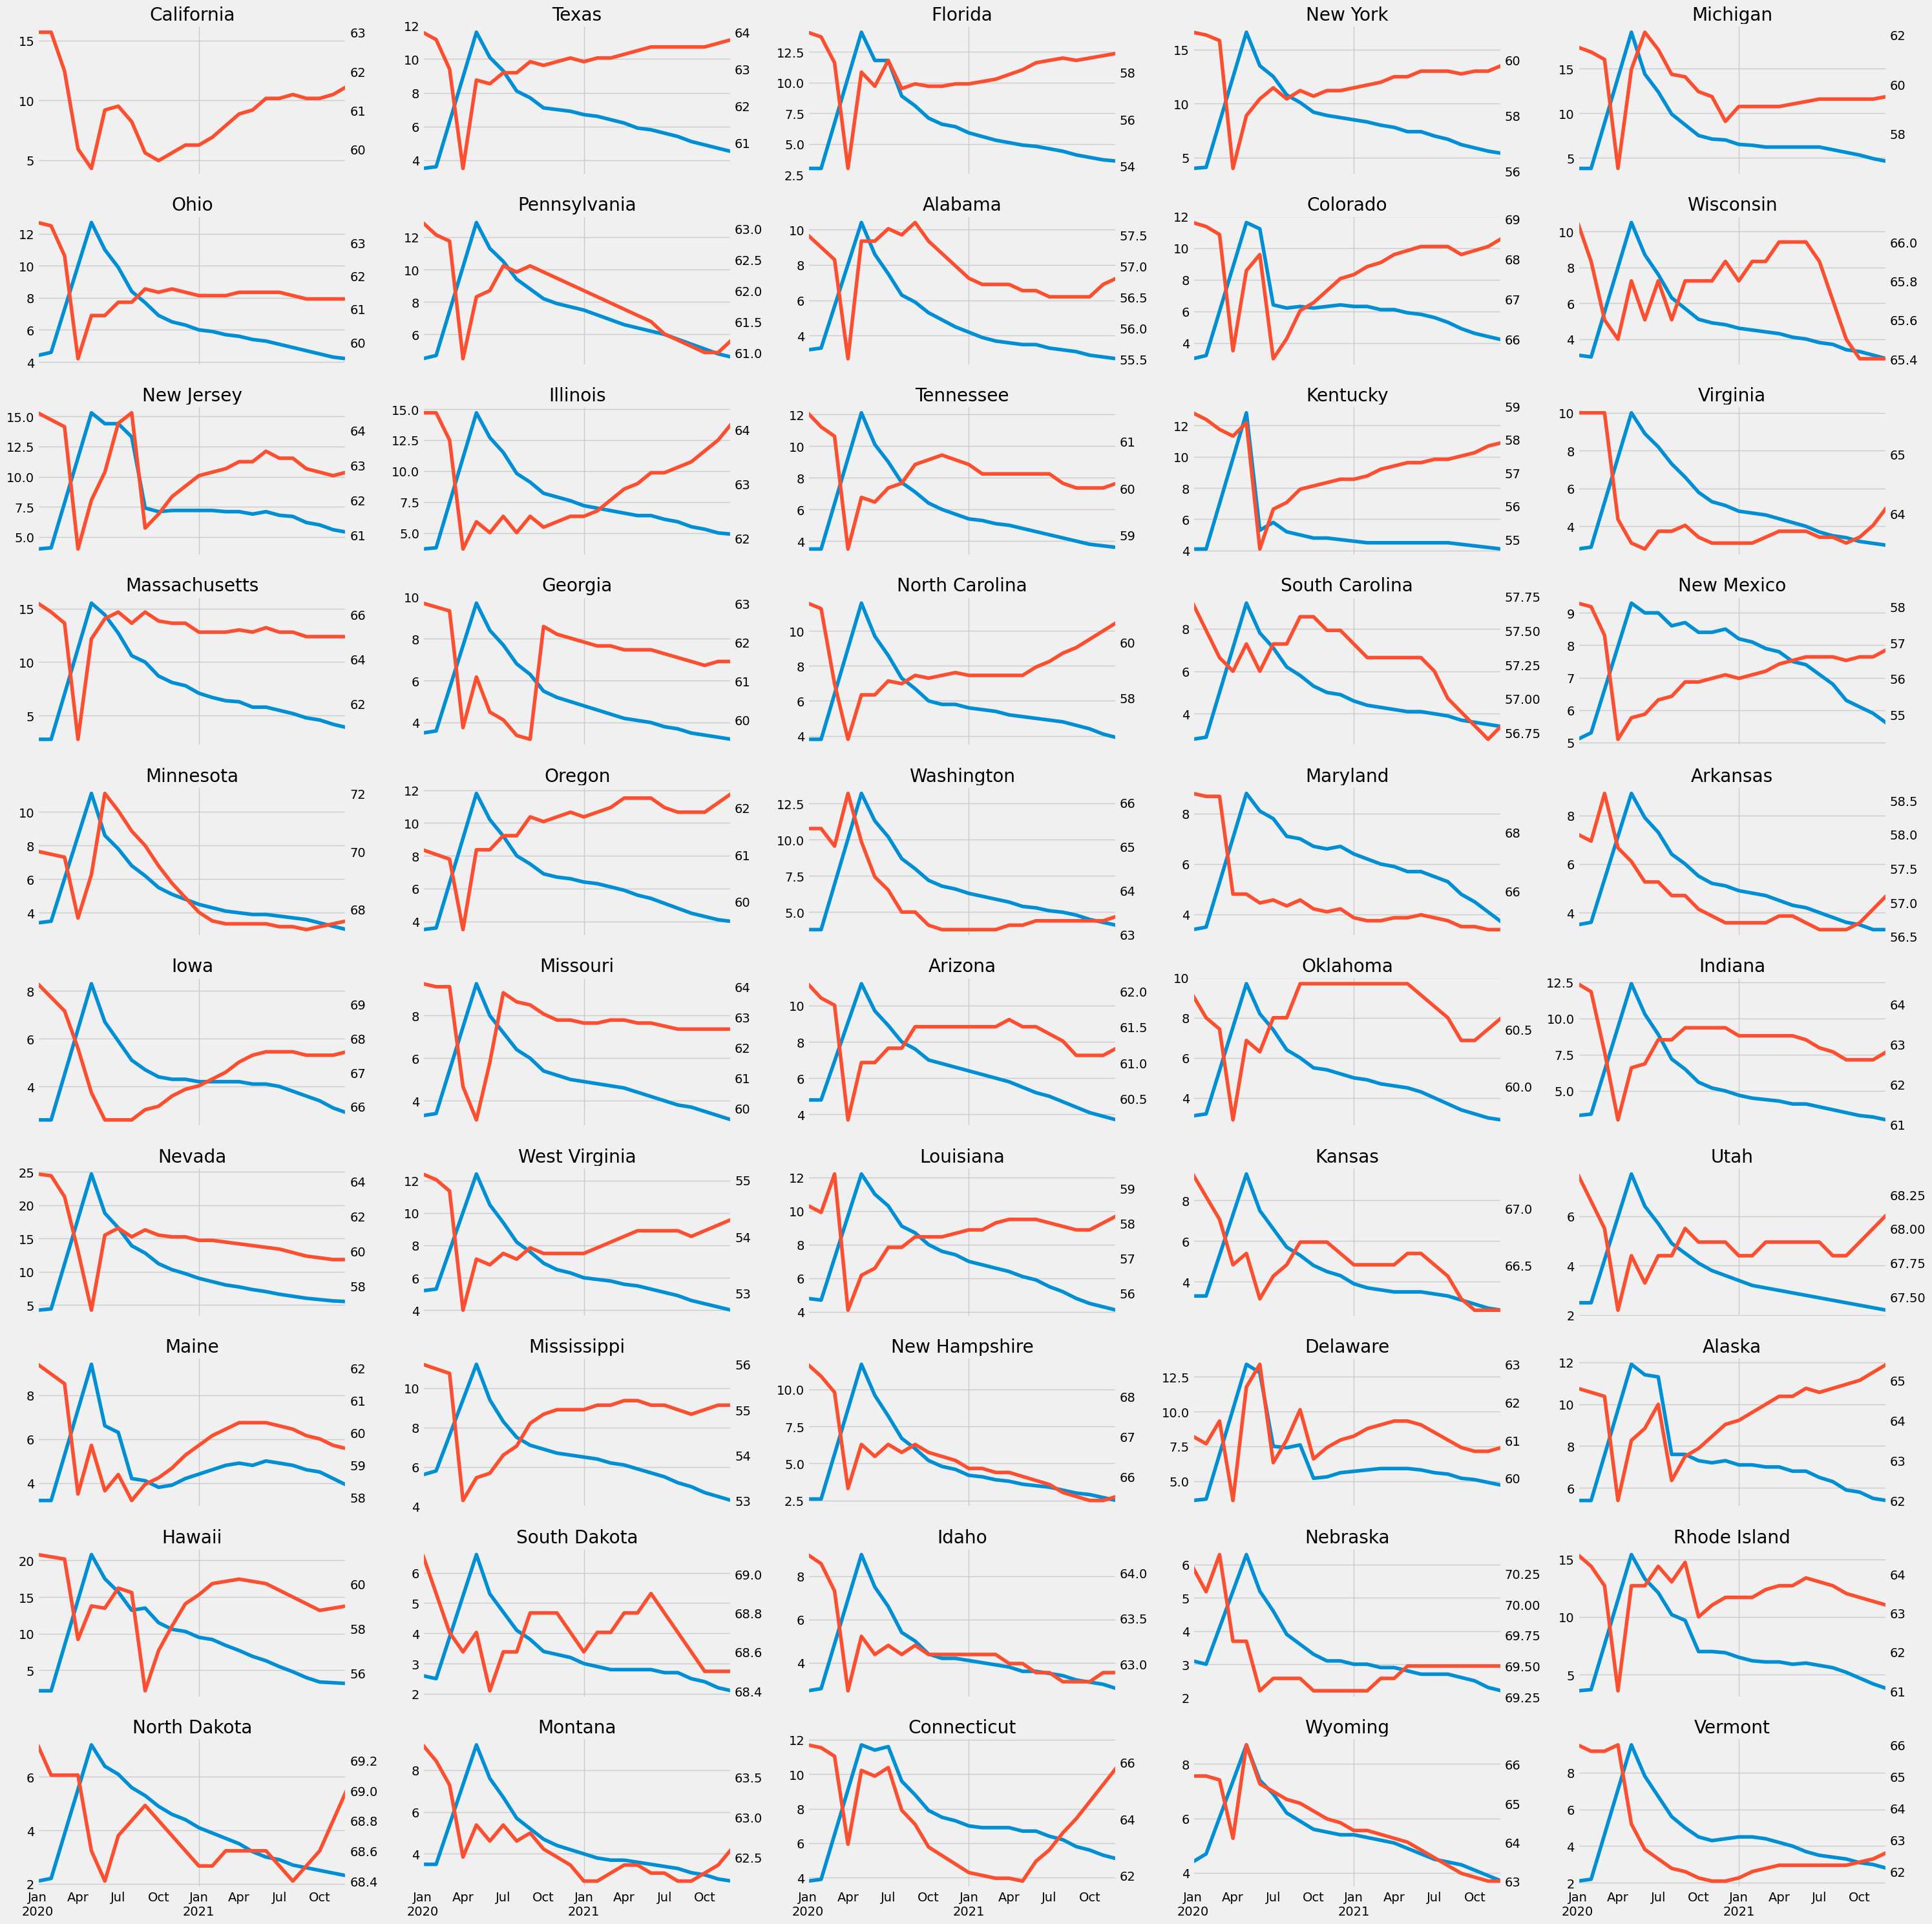

In [22]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

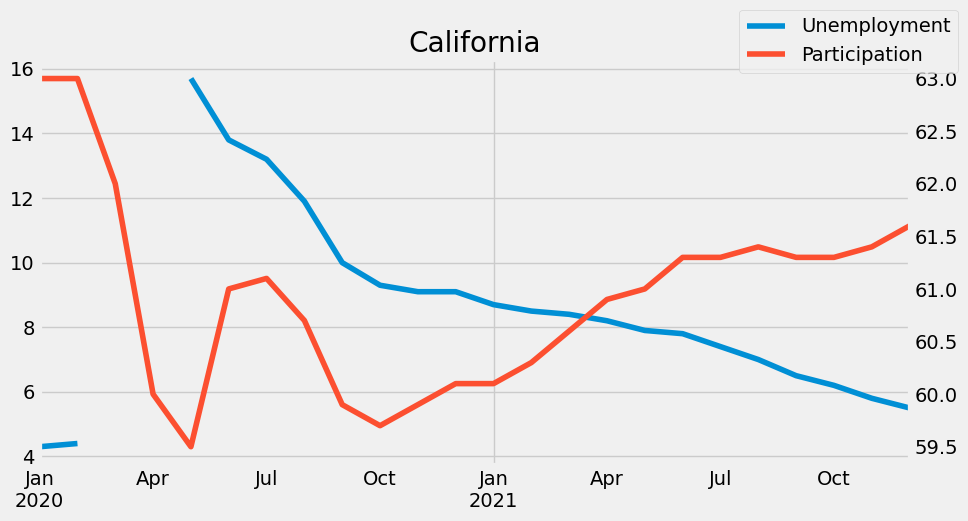

In [23]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()